In [16]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [17]:
F = 96485.3321233
R = 8.31446261815324

def nernst(z, T, Xin, Xout):
    return -(R * (273.15 + T)) / (z * F) * np.log(Xin / Xout) * 1e3

def goldman(T, Ps, XIs, XOs):
    return ((R * (273.15 + T)) / F) * np.log(
        sum(Ps[i] * XOs[i] for i in range(3)) / sum(Ps[i] * XIs[i] for i in range(3))
    ) * 1e3

In [18]:
X1In, X1Out = 400, 20 # K+
X2In, X2Out = 50, 440 # Na+
X3In, X3Out = 560, 52 # Cl-

In [19]:
P1 = 1.0
P2 = 1.0
P3 = 1.0

g1 = P1
g2 = P2
g3 = P3

E1 = nernst(1, 20, X1In, X1Out)
E2 = nernst(1, 20, X2In, X2Out)
E3 = nernst(1, 20, X3In, X3Out)

E1, E2, E3, goldman(20.0, [P1, P2, P3], [X1In, X2In, X3In], [X1Out, X2Out, X3Out])

(-75.67732729561521, 54.93795265563251, -60.0393368126409, -17.162327087331537)

In [20]:
Ps = np.linspace(0, 2, 100)
eqn1 = lambda p1, p2, p3: goldman(20.0, [p1, p2, p3], [X1In, X2In, X3In], [X1Out, X2Out, X3Out])
eqn2 = lambda g1, g2, g3: (g1 * E1 + g2 * E2 + g3 * E3) / (g1 + g2 + g3)

In [21]:
def err(G):
    g1, g2, g3 = G
    return (
          np.sum(np.square(eqn1(0, P2, P3) - eqn2(0, g2, g3)))
        + np.sum(np.square(eqn1(P1, 0, P3) - eqn2(g1, 0, g3)))
        #+ np.sum(np.square(eqn1(P1, P2, 0) - eqn2(g1, g2, 0)))
        + 2 * np.sum(np.square(eqn1(P1, P2, P3) - eqn2(g1, g2, g3)))
    )

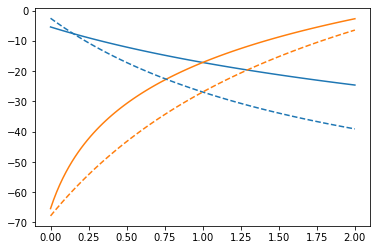

In [22]:
fig, ax = plt.subplots()
ax.plot(Ps, eqn1(P1 * Ps, P2, P3))
ax.plot(Ps, eqn1(P1, P2 * Ps, P3))
#ax.plot(Ps, eqn1(P1, P2, P3 * Ps))

ax.set_prop_cycle(None)

ax.plot(Ps, eqn2(g1 * Ps, g2, g3), '--')
ax.plot(Ps, eqn2(g1, g2 * Ps, g3), '--')
#ax.plot(Ps, eqn2(g1, g2, g3 * Ps), '--')

In [23]:
g1, g2, g3 = scipy.optimize.minimize(err, (g1, g2, g3), bounds=((0.01, None), (0.01, None), (0.01, None))).x
g1, g2, g3

(0.5294057735137617, 1.212057889636389, 1.3262339505117295)

In [24]:
err((g1, g2, g3))

1.0021966987715456

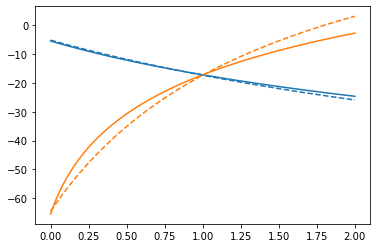

In [25]:
fig, ax = plt.subplots()
ax.plot(Ps, eqn1(P1 * Ps, P2, P3))
ax.plot(Ps, eqn1(P1, P2 * Ps, P3))
#ax.plot(Ps, eqn1(P1, P2, P3 * Ps))

ax.set_prop_cycle(None)

ax.plot(Ps, eqn2(g1 * Ps, g2, g3), '--')
ax.plot(Ps, eqn2(g1, g2 * Ps, g3), '--')
#ax.plot(Ps, eqn2(g1, g2, g3 * Ps), '--')